## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat May 31 17:12:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
| 85%   58C    P0             61W /  170W |    3027MiB /  12288MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [10]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\references


## Install YOLO11 via Ultralytics

In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40  Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Setup complete  (8 CPUs, 63.9 GB RAM, 1727.2/1861.7 GB disk)


## Fine-tune YOLO11 on Custom Data

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [1]:
from dotenv import load_dotenv
import os

HOME = os.getcwd()

#env_path = r"C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\.env"
env_path = f"{HOME}/.env"

load_dotenv(dotenv_path=env_path)
robo_token = os.getenv("ROBOFLOW_API_KEY")

!mkdir {HOME}/datasets
%cd {HOME}/datasets

#from google.colab import userdata
from roboflow import Roboflow



from roboflow import Roboflow
rf = Roboflow(api_key=robo_token)
project = rf.workspace("spencer-kmi6v").project("pool-detect-cnn")
version = project.version(2)
dataset = version.download("yolov11", location='../datasets/YOLO')

The syntax of the command is incorrect.


[WinError 2] The system cannot find the file specified: 'c:\\Users\\SABIO\\Documents\\GitHub\\Pool-Detection-CNN\\notebooks/datasets'
c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\notebooks
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ../datasets/YOLO in yolov11:: 100%|██████████| 590/590 [00:00<00:00, 1366.15it/s]


## Custom Training

Run the following block to train the model. Keep in mind it is currently set at 100 epochs which depending on your gpu, might take some time.

In [3]:
#%cd {HOME}
import os

HOME = r"C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\references"
os.chdir(HOME)

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True project='../models' name='detect/train'

New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=../models, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl


train: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\train\labels...:   0%|          | 0/202 [00:00<?, ?it/s]
train: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\train\labels... 74 images, 19 backgrounds, 0 corrupt:  37%|███▋      | 74/202 [00:00<00:00, 735.36it/s]
train: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\train\labels... 165 images, 60 backgrounds, 0 corrupt:  82%|████████▏ | 165/202 [00:00<00:00, 820.86it/s]
train: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\train\labels... 202 images, 64 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 831.14it/s]

val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\valid\labels...:   0%|          | 0/58 [00:00<?, ?it/s]
val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\valid\labels... 1 images, 1 backgrounds, 0 corrupt:   2%|▏         | 1/58 [00:00<00:07,

## Validate Fine-Tuned Model

Now we will validate the fine-tuned model. Here it might make sense to test some confidence thresholds. You can add `conf=0.25` or `conf=0.5` to see how it affects your results.

In [4]:
!yolo task=detect mode=val model=../models/detect/train/weights/best.pt data={dataset.location}/data.yaml project=../models name=detect/val

Ultralytics 8.3.40 🚀 Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
                   all         58         53      0.968      0.925      0.942      0.682
Speed: 1.4ms preprocess, 9.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to ..\models\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\valid\labels.cache... 58 images, 30 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]
val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\valid\labels.cache... 58 images, 30 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:02<00:08,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:03<00:02,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████████

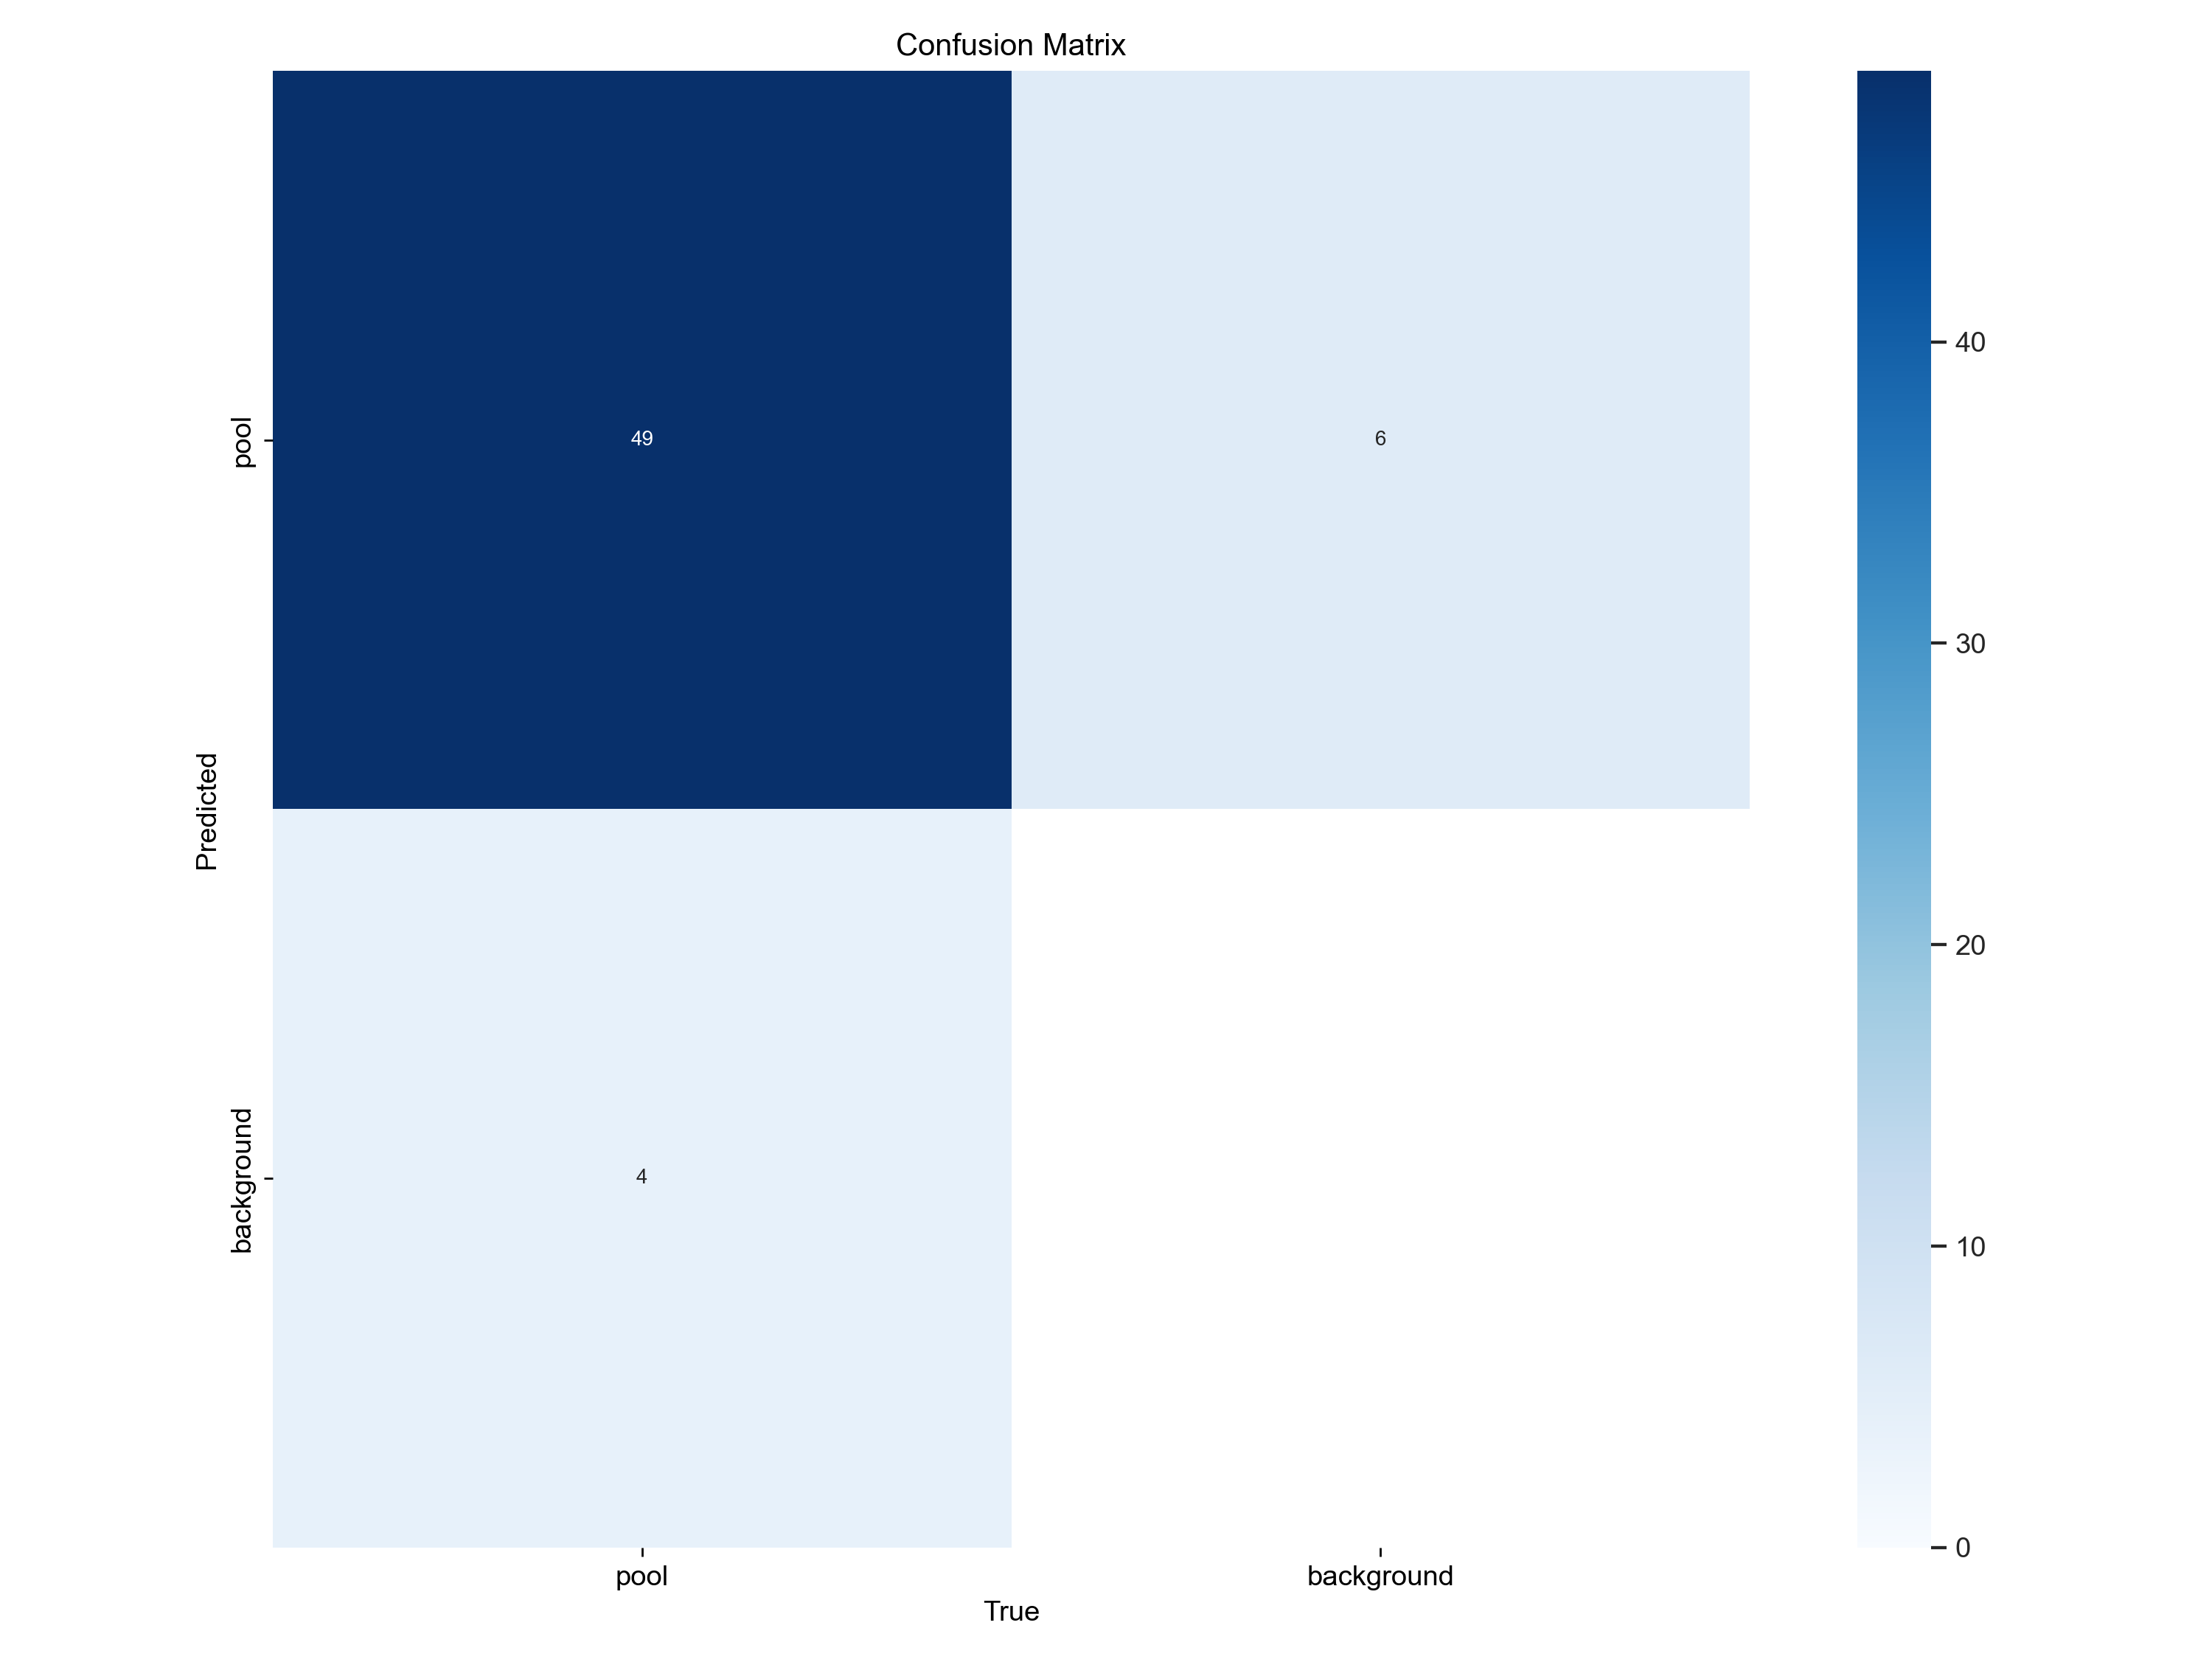

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'../models/detect/val/confusion_matrix.png', width=600)

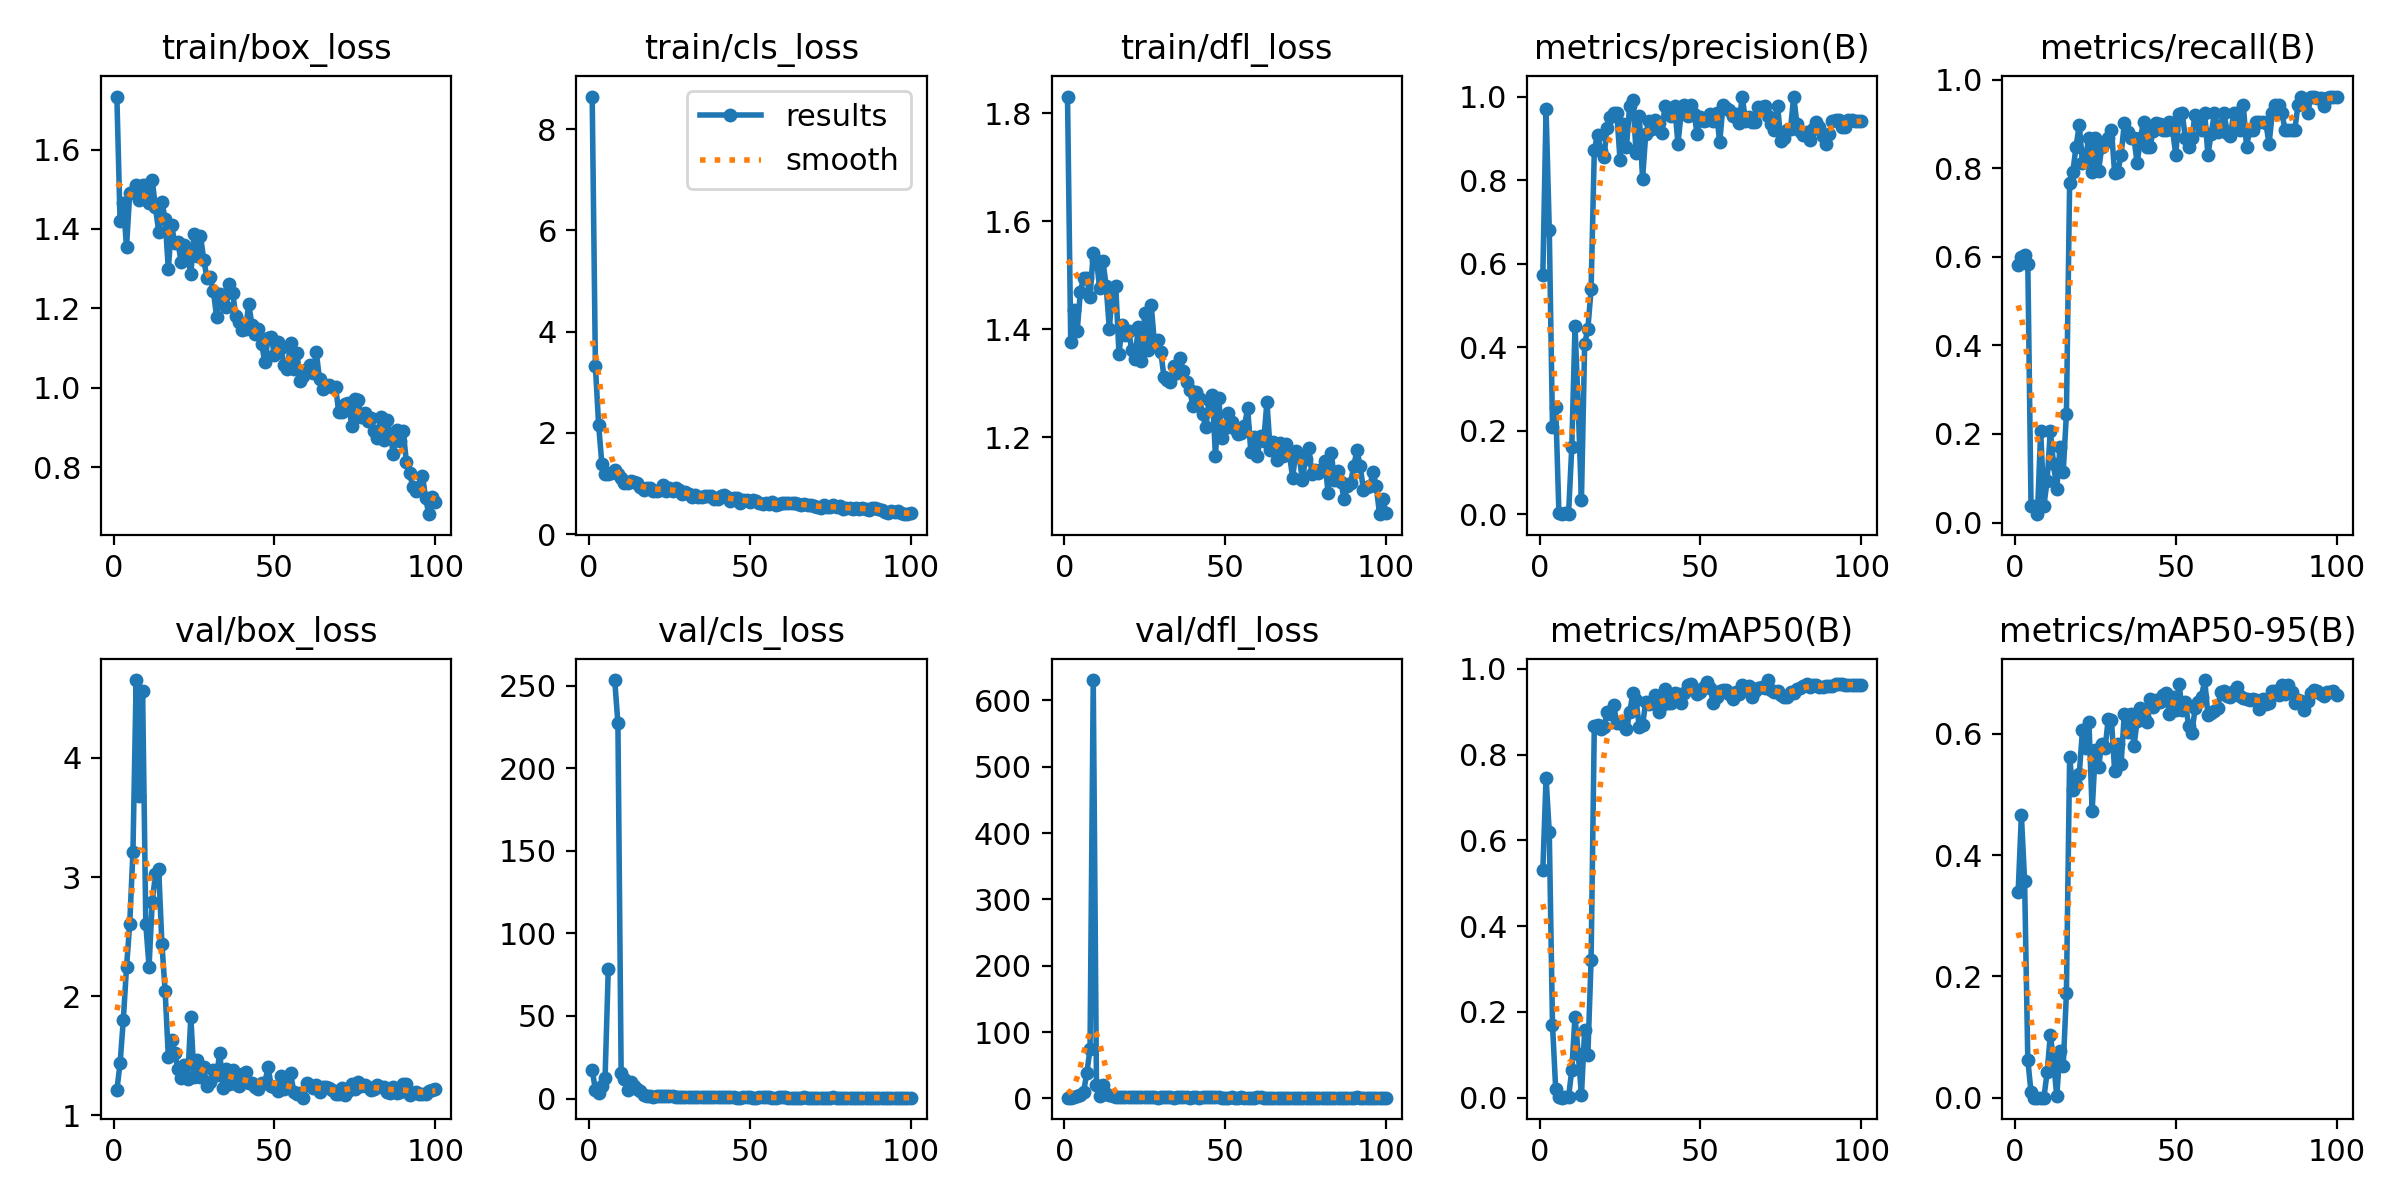

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'../models/detect/train/results.png', width=600)

## Inference with Custom model

Here I added `conf=0.5` as my model was detecting some false positives (pools where there were no pools) and the results had improved.

In [7]:
!yolo task=detect mode=predict model=../models/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True project=../models name=detect/predict

Ultralytics 8.3.40 🚀 Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\test\images\100_PNG.rf.ffdef2d2973836d984e179774e12de86.jpg: 640x640 2 pools, 12.7ms
image 2/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\test\images\109_PNG.rf.aa422e1fdcc7b5d65d43a8421bffe770.jpg: 640x640 1 pool, 10.1ms
image 3/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\test\images\111_PNG.rf.9b45c26604f5c59c4219cd5543aa56be.jpg: 640x640 (no detections), 11.3ms
image 4/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\test\images\127_PNG.rf.81e460b19419b9d1a527cb40a9a89179.jpg: 640x640 1 pool, 13.6ms
image 5/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\YOLO\test\images\128_PNG.rf.a566a461a338adb1d723df7dafe3f3b7.jpg: 640x640 5 pools, 14.5ms
image 6/2

**NOTE:** Let's take a look at few results.

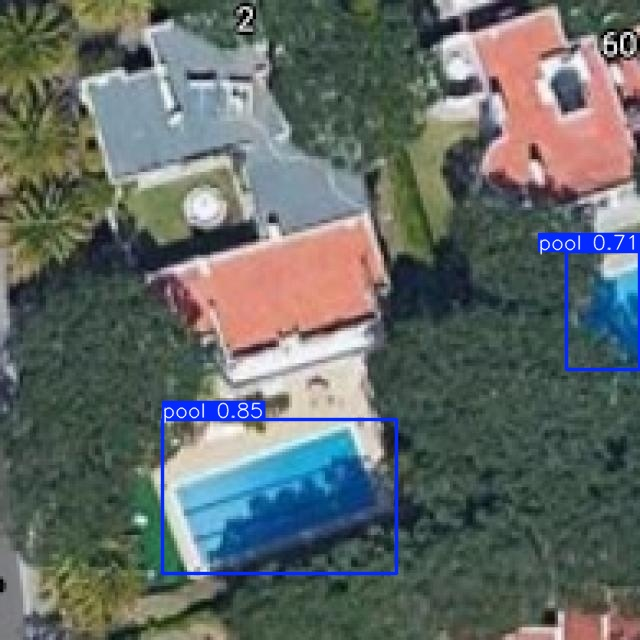

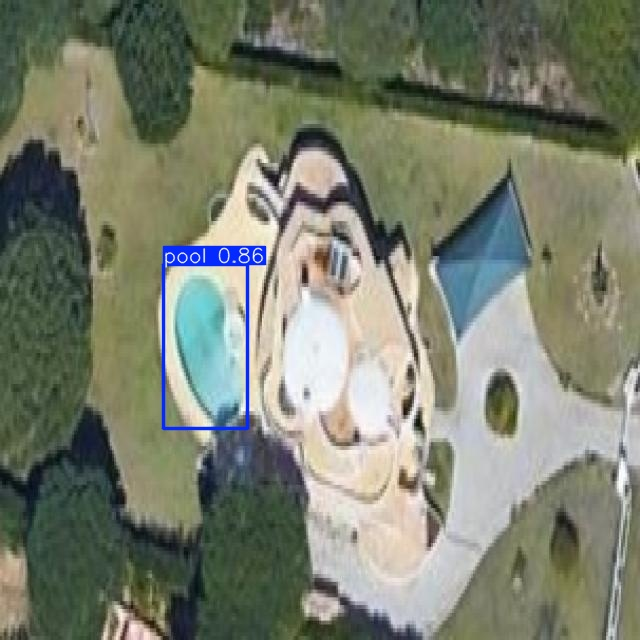

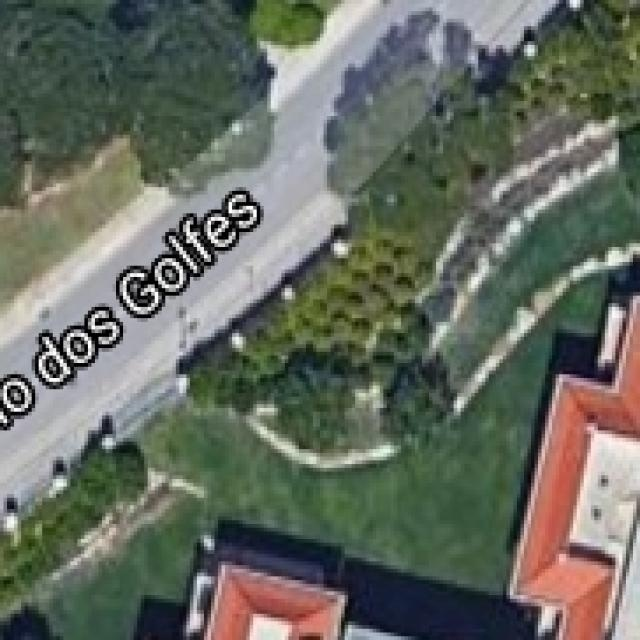

In [8]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'../models/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [9]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"../models/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
!pip install inference

Running inference on 253_png.rf.43e5f7d372f4d2c33715923d7cd55e2a.jpg


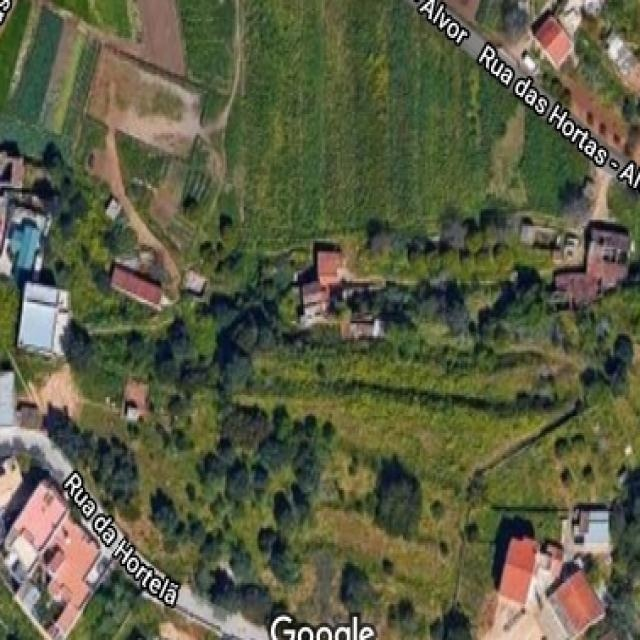

Running inference on 162_PNG.rf.e01bbd4a16290c37f63dfa86f2ec87af.jpg


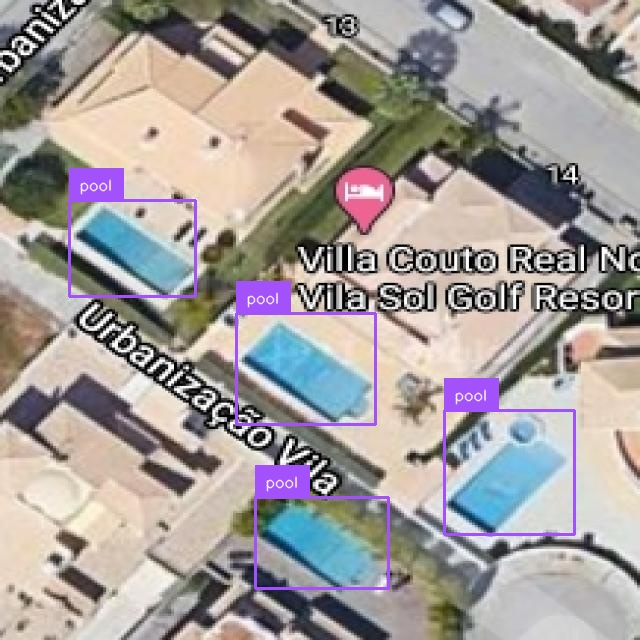

Running inference on 92_PNG.rf.30a6d3681e61742e6cec5b2a57e62d4f.jpg


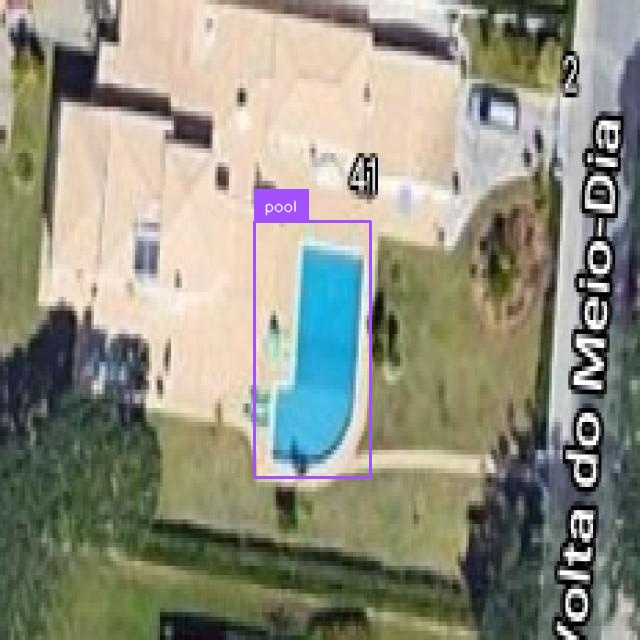

Running inference on 111_PNG.rf.9b45c26604f5c59c4219cd5543aa56be.jpg


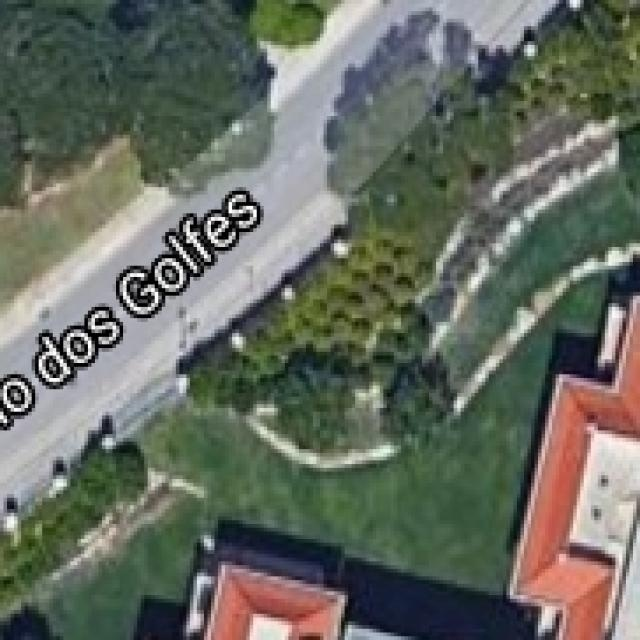

In [39]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, robo_token)

# Location of test set images
test_set_loc = dataset.location + f"/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
